https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/
## What do we see with an FFT?

In [1]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data-kDl1L.csv",parse_dates=['Date'])

In [3]:
df = df[['Date','Oahu']]

In [4]:
df

,Date,Oahu
0,2020-03-06,1
1,2020-03-07,0
2,2020-03-08,0
3,2020-03-09,1
4,2020-03-10,0
...,...,...
221,2020-10-13,30
222,2020-10-14,81
223,2020-10-15,74
224,2020-10-16,68


In [5]:
df.set_index("Date",inplace=True)

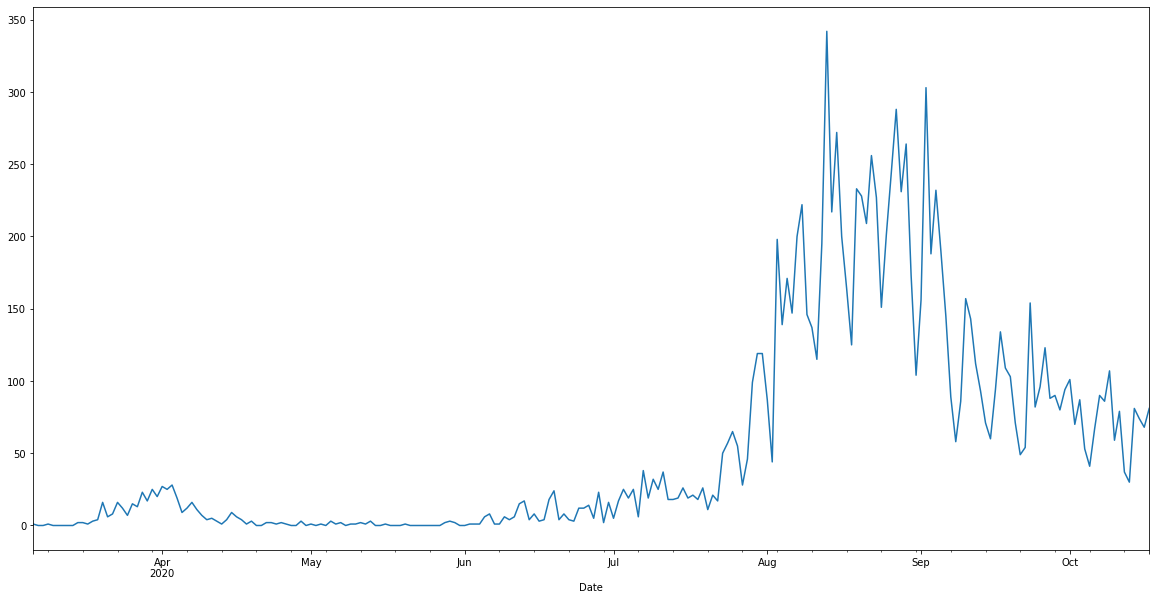

In [6]:
#fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#df['Oahu'].plot(ax=ax)
df['Oahu'].plot(figsize=(20,10));

In [7]:
Oahu_fft = sp.fftpack.fft(df['Oahu'])

In [8]:
Oahu_psd = np.abs(Oahu_fft) ** 2 #power density is fft^2

In [28]:
fftfreq = sp.fftpack.fftfreq(len(Oahu_psd), 1. / 14 ) #do 14 day periods of one day each

In [29]:
i = fftfreq > 0 # select the positive frequencies

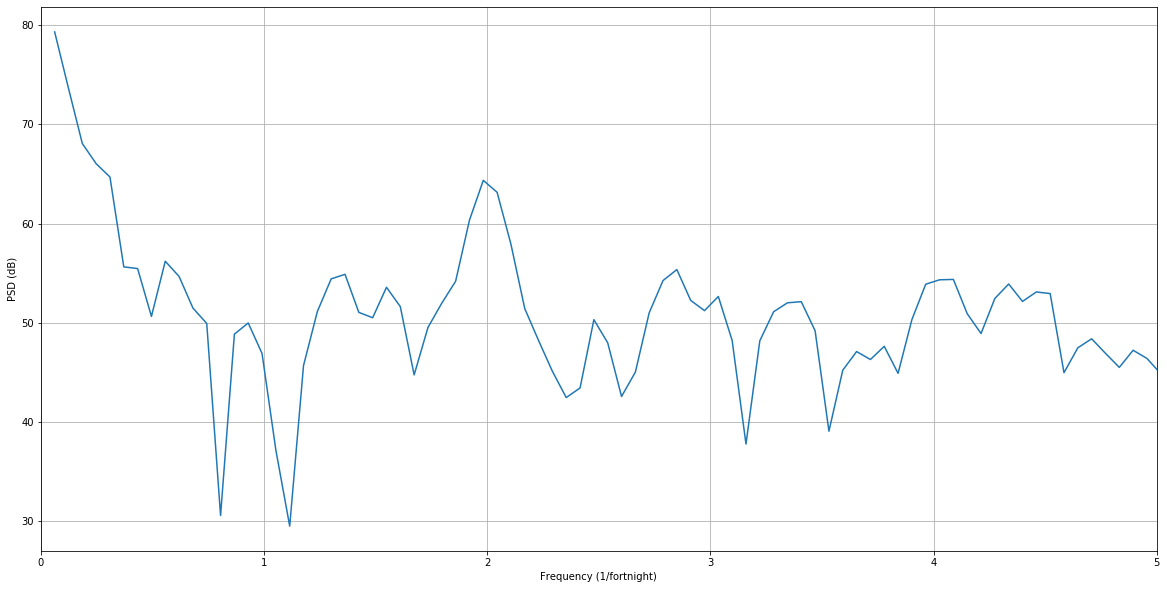

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(fftfreq[i], 10 * np.log10(Oahu_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/fortnight)')
ax.set_ylabel('PSD (dB)')
ax.grid();

In [185]:
Oahu_fft_bis = Oahu_fft.copy()
#Oahu_fft_bis[np.abs(fftfreq) < 1] = 0
Oahu_fft_bis[np.abs(fftfreq) > .92] /= 10
Oahu_fft_bis[np.abs(fftfreq) > 1.8] /= 10
Oahu_fft_bis[np.abs(fftfreq) > 2.57] /= 10

In [186]:
Oahu_slow = np.real(sp.fftpack.ifft(Oahu_fft_bis))
df['slow'] = Oahu_slow
dfPlot = df[7:-7]

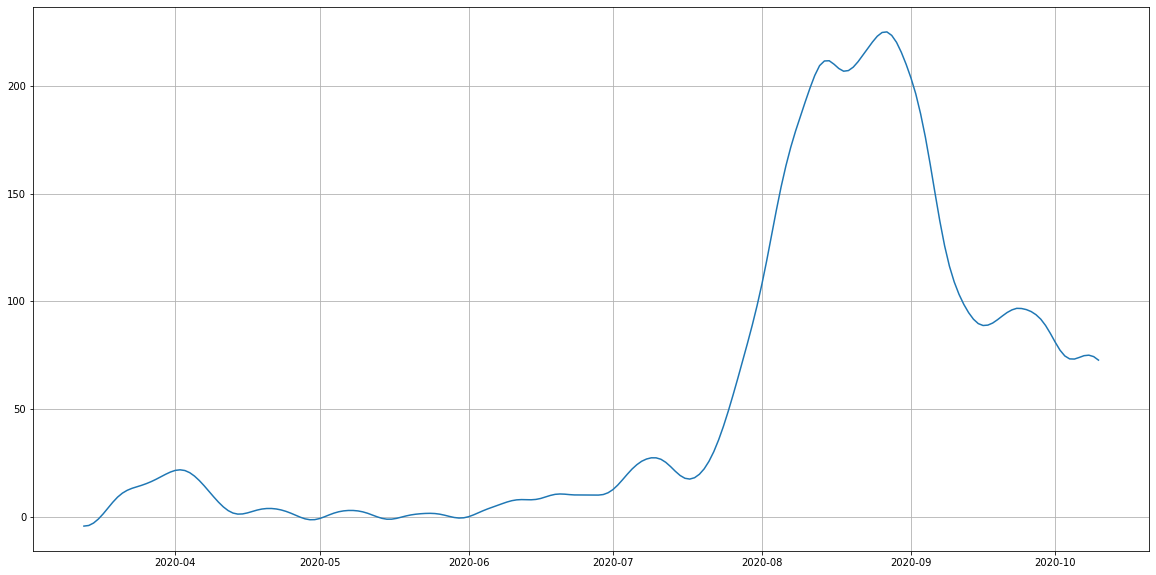

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(dfPlot.index,dfPlot['slow'])
ax.grid();